In [1]:
import json
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import re
from IPython.display import display, HTML
from tabulate import tabulate
from wordcloud import WordCloud



In [2]:
#lee datos del archivo csv
datos_img = pd.read_csv("datos_imagenes.csv")

#agrupa por tipo de img
tipo_img = datos_img.groupby('tipo').size()

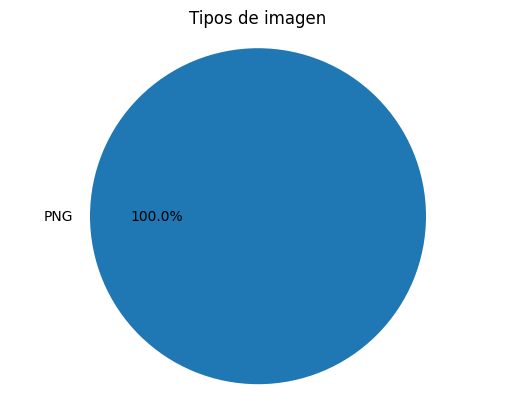

In [26]:
#creamos el grafico de torta
plt.pie(tipo_img, labels=tipo_img.index, autopct='%1.1f%%')
plt.axis('equal')  # Aseguramos que el gráfico de torta sea un círculo y no una elipse
plt.title('Tipos de imagen')
plt.show()


In [6]:
#creamos listas para poder guardar todos los numeros y despues buscar el mas grande entre ellos
anchos = []
altos = []

for resolucion in datos_img['resolucion']:
    match = re.search(r'\((\d+), (\d+)\)', resolucion)  #Se queda solo con el patrón "(ancho, alto)", ya que esta escrito de esta manera en el csv y no es posible usar solo los numeros de una
    if match:
        ancho = int(match.group(1)) #hace el match para ancho
        alto = int(match.group(2)) #hace el match para alto
        anchos.append(ancho)
        altos.append(alto)

ancho_maximo = max(anchos)
alto_maximo = max(altos)

#establece el tamaño de letra y tamaño
estilo = 'font-size: 30px; font-family: Helvetica'

# Mostrar el ancho máximo en el notebook con estilo personalizado
display(HTML(f'<span style="{estilo}">Ancho máximo: {ancho_maximo} píxeles </span>'))
display(HTML(f'<span style="{estilo}">Alto máximo: {alto_maximo} píxeles </span>'))

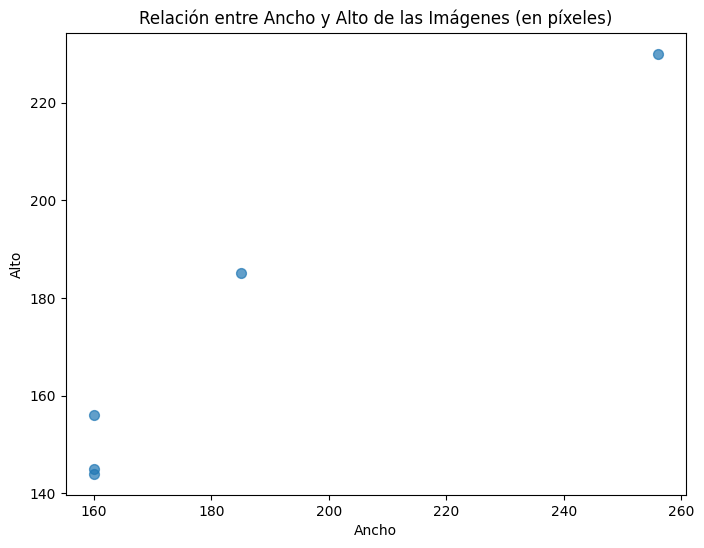

In [7]:
# Generar el gráfico de dispersión
plt.figure(figsize=(8, 6))  # Establecer el tamaño de la figura
plt.scatter(anchos, altos, s=50, alpha=0.7)  # Crear el gráfico de dispersión
plt.xlabel('Ancho')  # Etiqueta del eje x
plt.ylabel('Alto')  # Etiqueta del eje y
plt.title('Relación entre Ancho y Alto de las Imágenes (en píxeles)')  # Título del gráfico
plt.show()  # Mostrar el gráfico

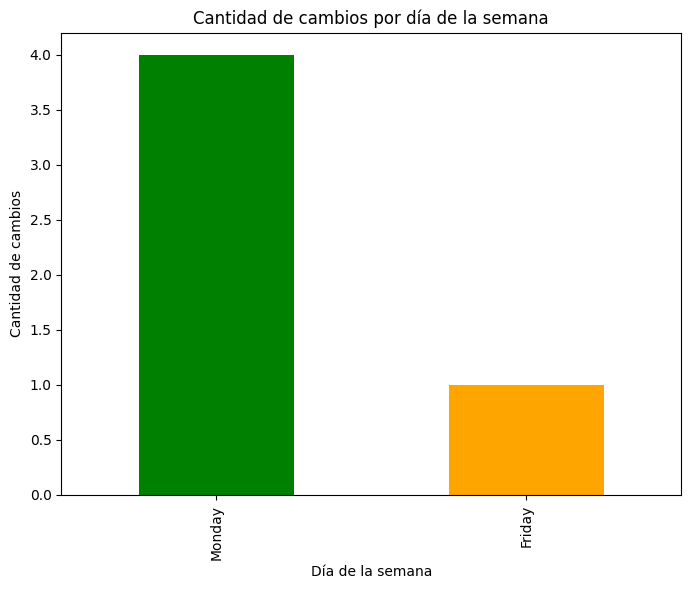

In [12]:
# Convertir la columna de fecha_actualizacion a tipo datetime para poder obtener el dia
datos_img['fecha_actualizacion'] = pd.to_datetime(datos_img['fecha_actualizacion'])

# Obtenemos el día de la semana para cada fecha de actualización
datos_img['dia_semana'] = datos_img['fecha_actualizacion'].dt.day_name()

# Conteo de cambios
cambios_por_dia = datos_img['dia_semana'].value_counts()

#creo lista de colores
colores = ['green', 'orange','blue', 'purple', 'red']

# Generar el gráfico de barras
plt.figure(figsize=(8, 6))  # tamaño
cambios_por_dia.plot(kind='bar', color=colores)  # Crear el gráfico de barras y colores
plt.xlabel('Día de la semana')  #eje x
plt.ylabel('Cantidad de cambios')  #eje y
plt.title('Cantidad de cambios por día de la semana')
plt.show()  # Mostrar el gráfico

In [18]:
#Obtiene todas las fechas, cuenta la cantidad de accesos por fecha y las ordena
accesos_por_fecha = datos_img['fecha_actualizacion'].value_counts().sort_index()

# Obtener el mes y día de cada fecha
x = accesos_por_fecha.index.strftime('%Y-%m-%d')


# Obtener la cantidad de accesos
y = accesos_por_fecha.values

#creando el grafico, estableciendo la x e y del grafico
df = pd.DataFrame({'x': x,'y':y })

fig = px.line(df, x = 'x', y = 'y',
              title = "Actualizaciones",
              labels = {'x': 'Fecha de actualizacion', 'y':'Numero de actualizaciones'},
              markers = True)

fig.show()

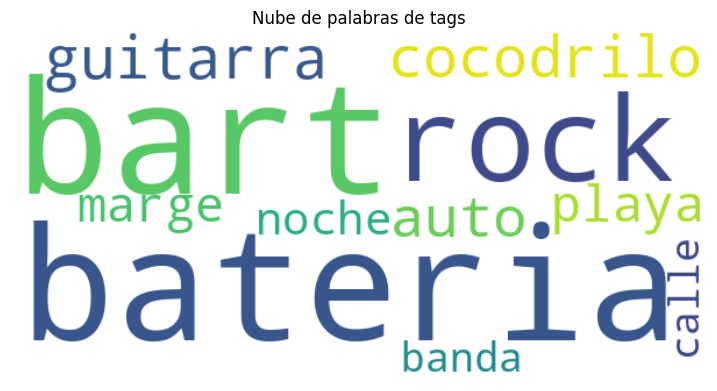

In [23]:
#Obtener la lista de tags
tags = datos_img['tags'].tolist()

#Crear cadena de texto con los tags
cadena_tags = ' '.join(tags)

#Crear la nube de palabras
nube = WordCloud(width=600, height=300, background_color='white').generate(cadena_tags)

plt.figure(figsize=(9, 5))  # Establecer el tamaño de la figura
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes x e y
plt.title('Nube de palabras de tags') #nombre
plt.show()

In [24]:
#Obtener la lista de tags
tags = datos_img['tags'].tolist()

#Separar los tags que están separados por comas y otros por espacios
tags_separados = [tag.split(',') if ',' in tag else tag.split() for tag in tags]

#Juntar las listas de tags
lista_tags_unida = list(itertools.chain(*tags_separados))

#Crear un DataFrame con los tags y su conteo
conteo_tags = pd.Series(lista_tags_unida).value_counts().reset_index()

#Renombrar las columnas
conteo_tags.columns = ['Tags', 'Usos']

#Obtener los 3 tags más utilizados
top_3_tags = conteo_tags.head(3)

#Creacion del titulo
estilo2 = 'font-size: 20px; font-family: Helvetica'
display(HTML(f'<span style="{estilo2}">Tags mas utilizados: </span>'))

# Convertir el DataFrame en una tabla en formato HTML
tabla = tabulate(top_3_tags, headers='keys', tablefmt='html')

estilo3 = 'font-size: 15px; font-family: Helvetica'
# Mostrar la tabla
display(HTML(f'<span style="{estilo3}">{tabla}</span>'))

,Tags,Usos
0,bart,2
1,bateria,2
2,rock,1


In [8]:
# Leer el archivo JSON de perfiles
with open('perfiles.json') as file:
    perfiles_data = json.load(file)

# Crear el DataFrame de perfiles
df_perfiles = pd.DataFrame(perfiles_data)

# Leer el archivo CSV de imágenes
df_imagenes = pd.read_csv('datos_imagenes.csv')

# Convertir la columna 'size' a tipo entero
df_imagenes['size'] = df_imagenes['size'].astype(int)

# Calcular el tamaño en bytes promedio de las imágenes actualizadas por cada perfil

# Agrupar por perfil y calcular el promedio del tamaño de las imágenes, y ordenar los resultados
promedio_tamanio = df_imagenes.groupby('ultimo_perfil')['size'].mean()
promedio_tamanio = promedio_tamanio.sort_values(ascending=False)

# Incluir los perfiles que no hayan realizado actualizaciones
promedio_tamanio = pd.merge(df_perfiles, promedio_tamanio, how='left', left_on='nick', right_index=True)

# Rellenar los valores faltantes con 0
promedio_tamanio['size'] = promedio_tamanio['size'].fillna(0)

# Ordenar tanto los valores como los índices del DataFrame
promedio_tamanio = promedio_tamanio.sort_index()

# Imprimir los resultados
print(promedio_tamanio[['nick', 'size']])


      nick      size
0    rocky   63295.0
1     neko   58312.0
2    abril  111015.0
3     maxi       0.0
4  girazol   71107.0
